# Digital music 

In [49]:
import modulesp as my

In [72]:
import pandas as pd
import numpy as np
import pandas as pd
import json 
import re
import nltk 
from textblob import TextBlob
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
warnings.filterwarnings("ignore")

In [3]:
import warnings
warnings.filterwarnings("ignore")
import re 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from time import time

In [2]:
starttime = time()

In [3]:
df = my.load_data("meta_Digital_Music.json","Digital_Music.json")

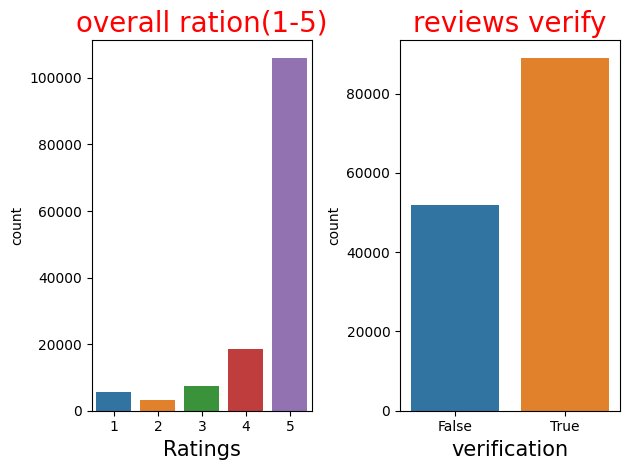

In [4]:
my.visual(df,"overall","verified")

In [5]:
my.info(df)

(140833, 17)

##########################################################

title             object
also_buy          object
brand             object
rank              object
also_view         object
price             object
asin              object
details           object
overall            int64
verified            bool
reviewTime        object
reviewerID        object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
dtype: object

##########################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140833 entries, 0 to 140832
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   title           140833 non-null  object
 1   also_buy        140833 non-null  object
 2   brand           140833 non-null  object
 3   rank            140833 non-null  object
 4   also_view       140833 non-null  object


In [6]:
df1 = pd.read_csv("data_filter.csv")

In [7]:
df1['price'] = df1['price'].apply(my.price_cleaning)

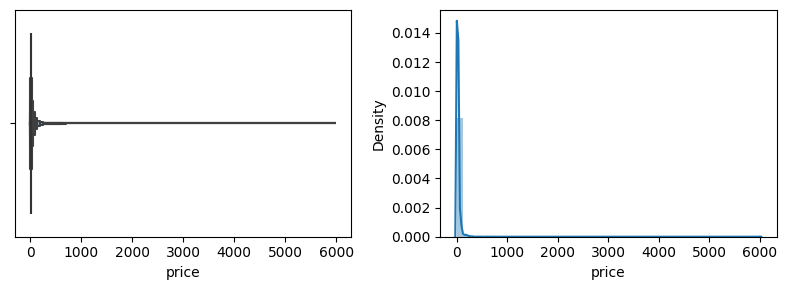

In [8]:
my.price_visual(df1,'price')

In [9]:
df1['rank_category'] = df1['rank'].apply(my.rank_cleaning)

 CDs & Vinyl        79893
 CDs &amp, Vinyl    11807
Name: rank_category, dtype: int64
################################################################


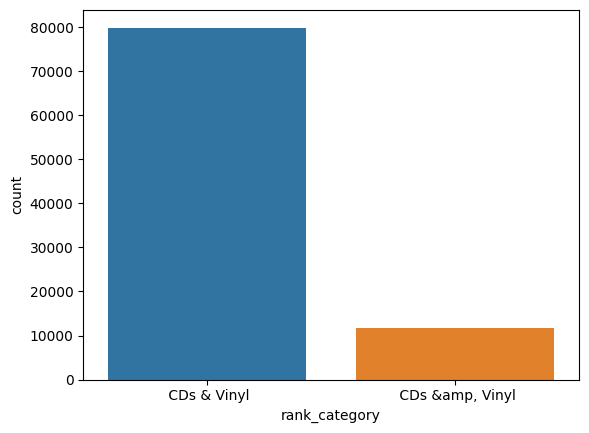

In [10]:
df1 = my.rank_category_clean(df1)

In [11]:
df1['rank_num'] = df1['rank'].apply(my.rank_num_cleaning)

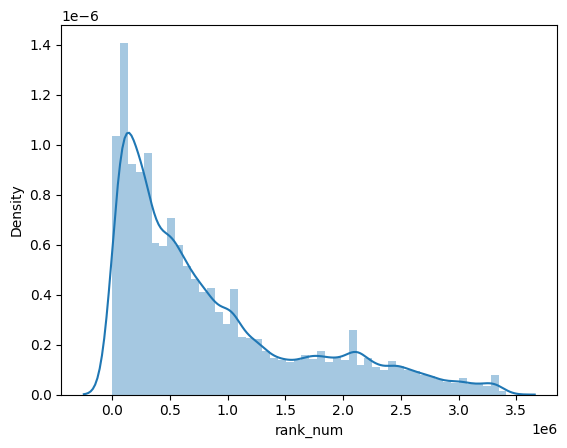

In [12]:
df1 = my.rank_num_visual(df1)

In [13]:
df1['reviewTime'] = df1['reviewTime'].apply(my.review_time)

In [14]:
df1 = my.review_time_clean(df1,'reviewTime')

In [15]:
df1.dtypes

title                     object
also_buy                  object
brand                     object
also_view                 object
price                    float64
asin                      object
details                   object
overall                    int64
verified                    bool
reviewTime        datetime64[ns]
reviewerID                object
style                     object
reviewerName              object
reviewText                object
summary                   object
unixReviewTime             int64
rank_category             object
rank_num                   int64
dtype: object

## brand

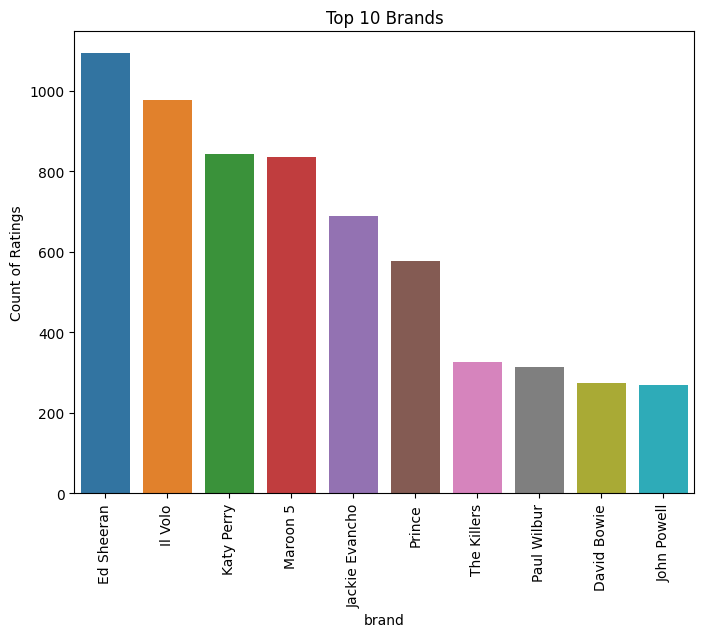

In [16]:
fig=plt.figure(figsize=(8,6))
g12=df1.groupby("brand").size().sort_values(ascending=False)[3:13]
g11=pd.DataFrame(g12)
sns.barplot(data=g11,x=g11.index,y=g11[0]);
plt.ylabel("Count of Ratings");
plt.title("Top 10 Brands");
plt.xticks(rotation=90);

## title

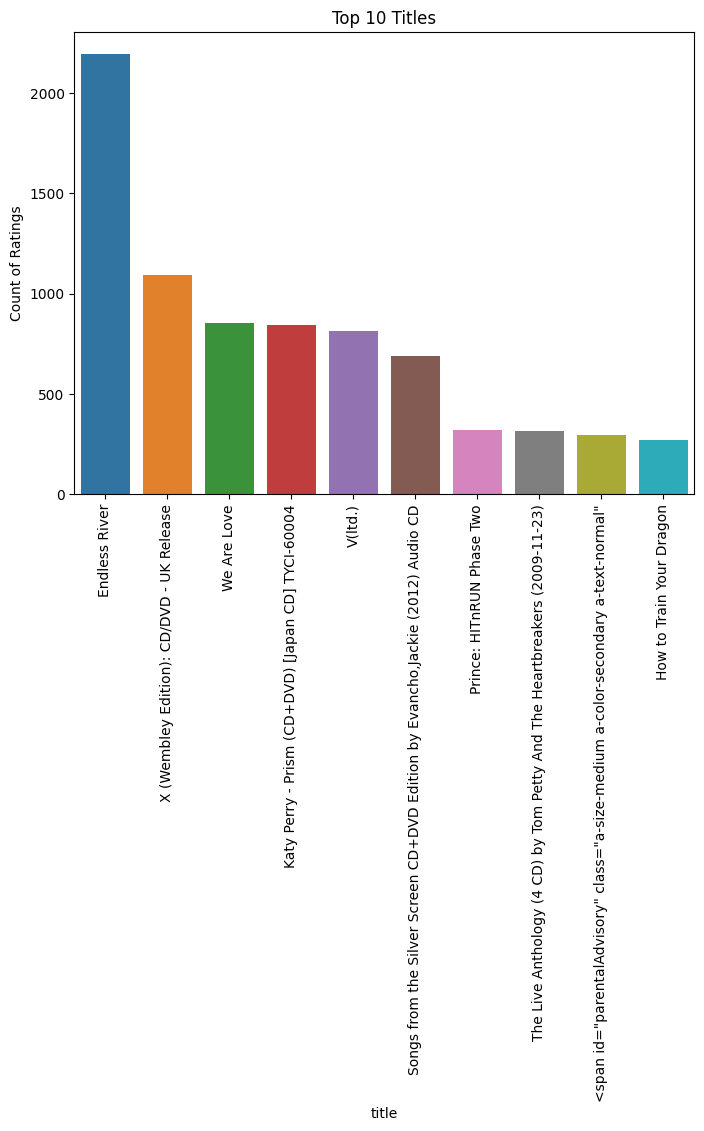

In [17]:
fig=plt.figure(figsize=(8,6))
g12=df1.groupby("title").size().sort_values(ascending=False)[1:11]
g11=pd.DataFrame(g12)
sns.barplot(data=g11,x=g11.index,y=g11[0]);
plt.ylabel("Count of Ratings");
plt.title("Top 10 Titles");
plt.xticks(rotation=90);

## style 

In [18]:
df1['style'] = df1['style'].apply(my.style_clean)

Audio CD                 72610
Vinyl                    10253
MP3 Music                 7636
DVD                        392
Audio Cassette             391
DVD Audio                  147
Blu-ray Audio               88
Hardcover                   44
Blu-ray                     40
Paperback                   24
Amazon Video                20
USB Memory Stick            12
VHS Tape                    10
Unknown Binding              6
Mass Market Paperback        5
CD-ROM                       5
Vinyl Bound                  4
Prime Video                  3
Video CD                     3
MP3 CD                       2
Unbound                      1
CD-R                         1
Kitchen                      1
Misc. Supplies               1
CD Video                     1
Name: style, dtype: int64
###################################################################
(82390, 18)
###################################################################


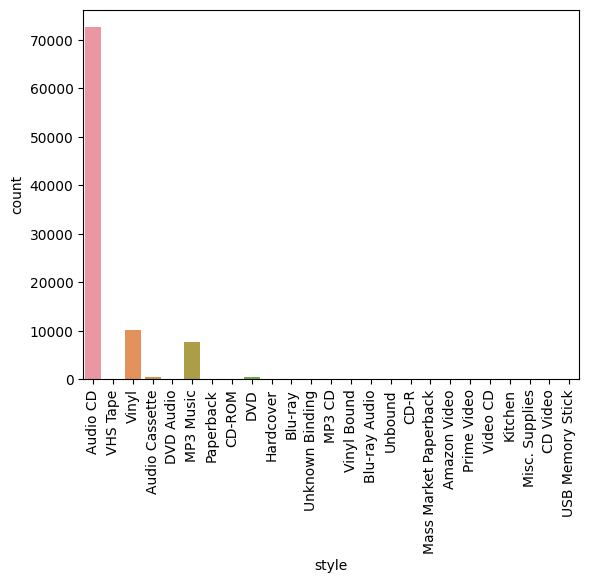

In [19]:
df1 = my.style_visual(df1)

In [20]:
df1['unixReviewTime'] = df1['unixReviewTime'].apply(my.uniexreviewtime)

In [21]:
df1['Label'] = df1['details'].apply(my.details_label)

In [22]:
df1 = my.label_clean(df1)

NA                             18559
Import                          3399
UNIVERSAL MUSIC JAPAN           1937
Integrity Music                 1646
Interscope                       893
                               ...  
The Electric Label                 1
CONNOISSEUR RECORDS                1
Major League Entertainment         1
DV MORE                            1
RCA Records Label Nashville        1
Name: Label, Length: 8330, dtype: int64


In [23]:
df1.to_csv("label.csv")

In [24]:
df1.head(2)

,title,brand,price,asin,overall,verified,reviewTime,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,rank_category,rank_num,Label
0,Passages,Philip Glass,10.27,B000026GO2,5,False,1998-06-10,A1SUA5AA99KPMO,Audio CD,Ali Hussein,The phenomenal sound of Ravi Shankar & the pla...,A mixture of divine sound & artistry!,1998-06-10T05:30:00,CDs & Vinyl,1249832,NA
1,Passages,Philip Glass,10.27,B000026GO2,5,False,1998-06-10,A1SUA5AA99KPMO,Audio CD,Ali Hussein,The phenomenal sound of Ravi Shankar & the pla...,A mixture of divine sound & artistry!,1998-06-10T05:30:00,CDs & Vinyl,1249832,NA


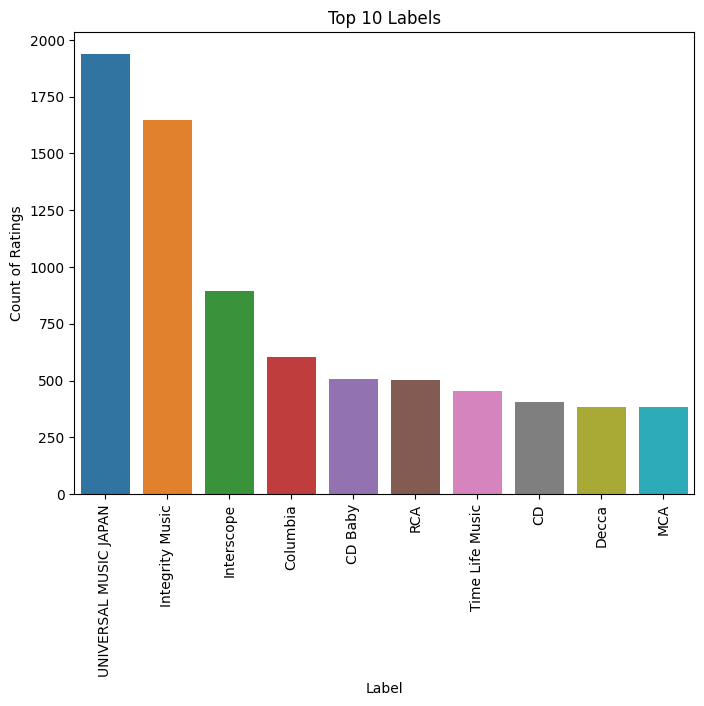

In [25]:
fig=plt.figure(figsize=(8,6))
g12=df1.groupby("Label").size().sort_values(ascending=False)[2:12]
g11=pd.DataFrame(g12)
sns.barplot(data=g11,x=g11.index,y=g11[0]);
plt.ylabel("Count of Ratings");
plt.title("Top 10 Labels");
plt.xticks(rotation=90);

In [26]:
endtime = time() - starttime
print("endtime : ",endtime)

endtime :  74.75221967697144


In [27]:
# merging two columns
df1["reviews"]=df1["reviewText"]+df1["summary"]
df1.drop(['reviewText','summary'],axis = 1,inplace = True)

In [28]:
# cleaning review column
df1['reviews'] = df1['reviews'].apply(my.reviews_cleaning)

In [29]:
from textblob import TextBlob
# sentiment
sentiment=[]
polarity = []
for i in df1["reviews"]:
    se=TextBlob(i)
    sco=se.sentiment.polarity
    polarity.append(sco)
    if sco>0:
        sentiment.append("positive")
    elif sco==0:
        sentiment.append("neutral")
    else:
        sentiment.append("negative")
df1['sentiment'] = sentiment
df1['polarity'] = polarity

positive    72038
neutral      6312
negative     4040
Name: sentiment, dtype: int64


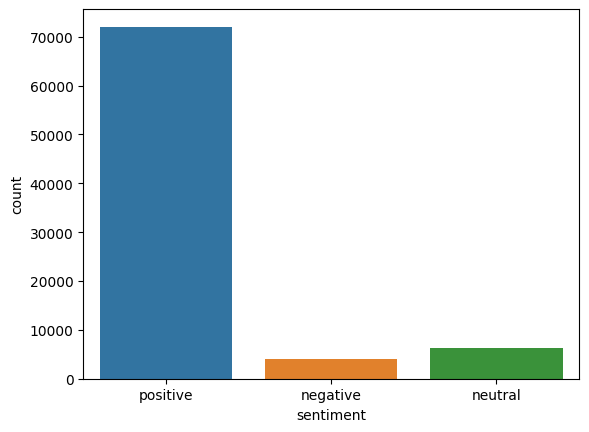

In [30]:
sns.countplot(df1['sentiment']);
print(df1['sentiment'].value_counts())

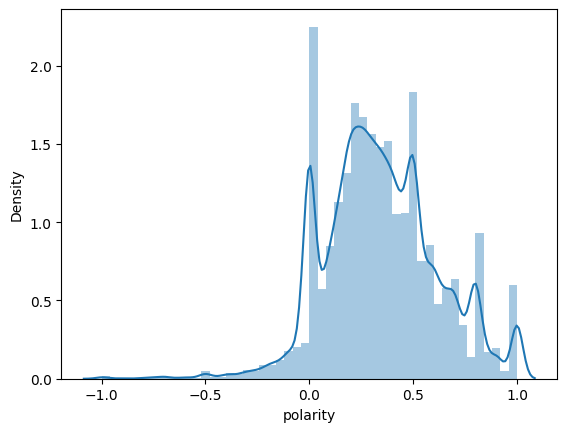

In [31]:
sns.distplot(df1['polarity']);

## Most of the reviews are +ve 

In [32]:
wordcloud = df1['reviews']

## tfidf

In [33]:
df1['reviews'] = my.tfidf(df1,'reviews')

In [34]:
df1.to_csv("encode.csv")

In [35]:
df1['title'] = my.tfidf(df1 , 'title')

In [36]:
df2 = df1.loc[:,['overall','reviewTime']]  # for time series

## label encoding

In [37]:
col = ['brand','verified','style','sentiment','rank_category','Label']
for i in col:
    df1[i] = my.label_encoding(df1,i)

In [38]:
df1.drop(['asin','reviewTime','reviewerID','reviewerName','unixReviewTime'],axis = 1,inplace = True)

In [39]:
df1.to_csv("correlation.csv")

## normalization

In [40]:
df1 = my.normalization(df1)
df1['polarity'] = polarity
df1.head()

,title,brand,price,overall,verified,style,rank_category,rank_num,Label,reviews,sentiment,polarity
0,0.176389,0.681762,0.001710,1.00,0.0,0.047619,0.0,0.365918,0.575339,0.162015,1.0,0.360000
1,0.176389,0.681762,0.001710,1.00,0.0,0.047619,0.0,0.365918,0.575339,0.162015,1.0,0.360000
2,0.235886,0.929013,0.003330,0.75,0.0,0.047619,1.0,0.233777,0.093529,0.156529,1.0,0.305556
3,0.246896,0.579956,0.000418,0.75,0.0,0.047619,0.0,0.495670,0.565254,0.233245,1.0,0.060206
4,0.249446,0.421749,0.000640,1.00,0.0,0.047619,0.0,0.693881,0.575339,0.239323,1.0,0.309821


## clustering

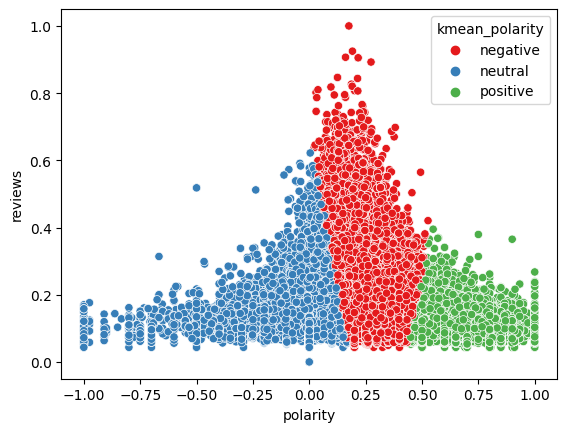

In [41]:
my.clustering(df1,'polarity','reviews')

## time series 

In [43]:
import modulesz as my
df2.index = df2.reviewTime
df2.drop("reviewTime",axis = 1,inplace = True)

In [44]:
df2.to_csv("time_series.csv")

In [45]:
df2

,overall
reviewTime,
1998-06-10,5
1998-06-10,5
1998-06-11,4
1998-07-27,4
1998-08-03,5
...,...
2018-09-22,2
2018-09-25,5
2018-09-25,5


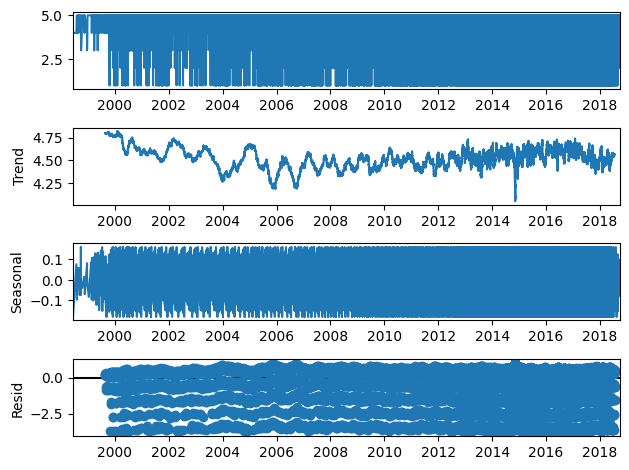

In [46]:
my.seasonal(df2 , 365)

## not clear patterns . Doing sampling for better visual

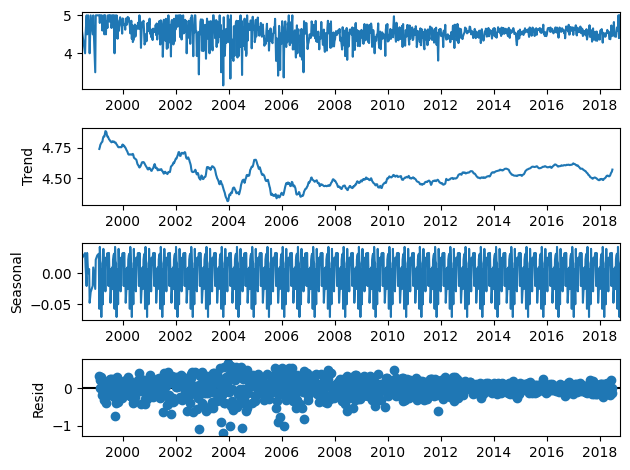

In [47]:
sample_df = df2.resample('W').mean()  # monthly SAMPLING 
sample_df.dropna(inplace = True)
my.seasonal(sample_df,30)

### trend , irregular patterns ,level , seasonality is present

In [48]:
import my_function as my

In [49]:
my.checkstationary(sample_df)

pvalue :  0.0004666312921519857
Data is Stationary


In [34]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [51]:
model1 = ExponentialSmoothing(sample_df , trend = 'add',seasonal = 'add',seasonal_periods=12).fit(
                                                                smoothing_level=0.2,smoothing_trend=0.2,smoothing_seasonal=0.2)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [52]:
prediction_model1 = model1.fittedvalues  # predictions 
prediction_model1

reviewTime
1998-06-14    4.508685
1998-08-02    4.424906
1998-08-09    4.495310
1998-08-23    4.555559
1998-08-30    4.516861
                ...   
2018-09-09    4.543979
2018-09-16    4.666944
2018-09-23    4.743011
2018-09-30    4.691121
2018-10-07    4.816417
Length: 1041, dtype: float64

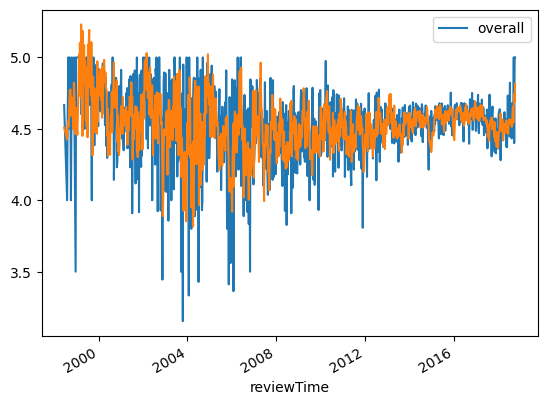

In [53]:
sample_df.plot();
prediction_model1.plot();

## stationary check

In [54]:
my.checkstationary(prediction_model1)  # stationary check

pvalue :  4.257717748560036e-05
Data is Stationary


## corrleleogram

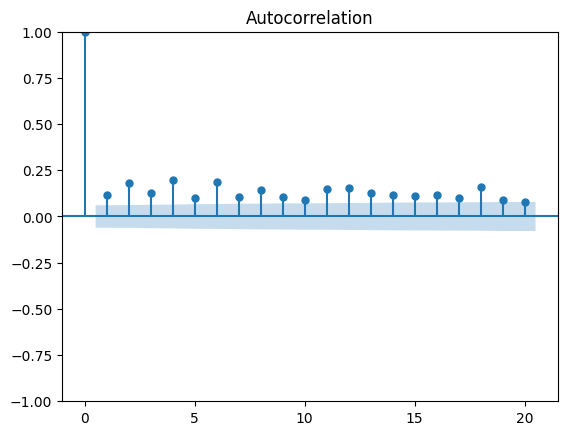

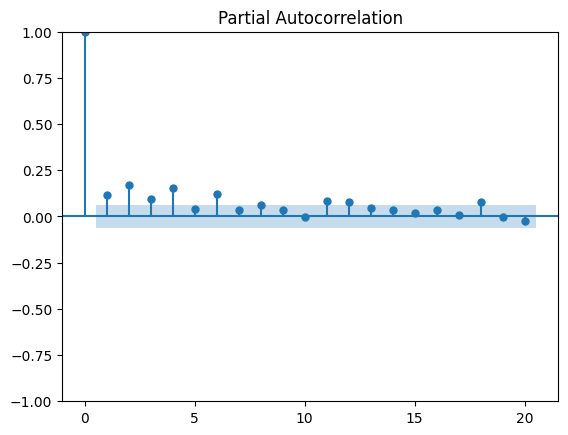

In [55]:
plot_acf(sample_df,lags = 20);
plot_pacf(sample_df,lags = 20);

## q = 10 , p = 5 ,d = 0

In [56]:
my.arma(prediction_model1,5,10,0) 

p : 1, q : 1, AIC :  -1171.7637463017968
p : 1, q : 2, AIC :  -1182.5199496597259
p : 1, q : 3, AIC :  -1183.441648347788
p : 1, q : 4, AIC :  -1186.2335435219811
p : 1, q : 5, AIC :  -1184.241537972895
p : 1, q : 6, AIC :  -1185.2876307488127
p : 1, q : 7, AIC :  -1197.7028155314354
p : 1, q : 8, AIC :  -1195.801203574975
p : 1, q : 9, AIC :  -1193.8095461625176
p : 2, q : 1, AIC :  -1186.0765067470638
p : 2, q : 2, AIC :  -1236.7154088858902
p : 2, q : 3, AIC :  -1235.832431506578
p : 2, q : 4, AIC :  -1234.4668418202932
p : 2, q : 5, AIC :  -1231.0506103067723
p : 2, q : 6, AIC :  -1232.5544885952172
p : 2, q : 7, AIC :  -1196.0137440294131
p : 2, q : 8, AIC :  -1238.8197706234885
p : 2, q : 9, AIC :  -1269.8002065896346
p : 3, q : 1, AIC :  -1185.6330555886575
p : 3, q : 2, AIC :  -1235.7010136683261
p : 3, q : 3, AIC :  -1239.3355026717686
p : 3, q : 4, AIC :  -1241.0799116349194
p : 3, q : 5, AIC :  -1213.2320396110322
p : 3, q : 6, AIC :  -1241.9938976017975
p : 3, q : 7, AIC : 

## Less information loss at p = 3 , q = 9 . Hence better model ARMA(3,3)

In [44]:
from statsmodels.tsa.arima.model import ARIMA  # library 

In [57]:
arma = ARIMA(prediction_model1,order = (3,0,9)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1041
Model:                 ARIMA(3, 0, 9)   Log Likelihood                 650.016
Date:                Mon, 20 Mar 2023   AIC                          -1272.032
Time:                        12:14:47   BIC                          -1202.761
Sample:                             0   HQIC                         -1245.755
                               - 1041                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5367      0.023    197.974      0.000       4.492       4.582
ar.L1         -0.1792      0.089     -2.015      0.044      -0.354      -0.005
ar.L2          0.9070      0.032     28.559      0.000       0.845       0.969
ar.L3          0.1722      0.073      2.361      0.018       0.029       0.315
ma.L1          0.5851      0.089      6.586      0.000       0.411       0.759
ma.L2         -0.4351      0.068     -6.374      0.000      -0.569      -0.301
ma.L3         -0.0550      0.049     -1.128      0.259      -0.151       0.041
ma.L4          0.0743      0.041      1.801      0.072      -0.007       0.155
ma.L5         -0.2002      0.043     -4.610      0.000      -0.285      -0.115
ma.L6         -0.1641      0.037     -4.436      0.000      -0.237      -0.092
ma.L7          0.1614      0.034      4.724      0.000       0.094       0.228
ma.L8         -0.0863      0.041     -2.120      0.034      -0.166      -0.007
ma.L9         -0.3119      0.033     -9.546      0.000      -0.376      -0.248
sigma2         0.0167      0.001     30.557      0.000       0.016       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               128.03
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ljung box test

In [58]:
my.ljung(arma)

pvalue :  [0.74998298]
Accept Ho -> good model


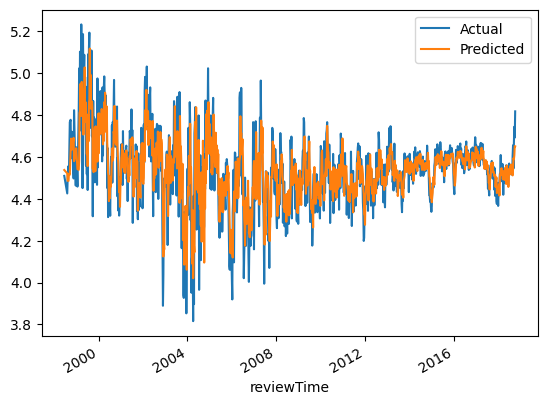

In [59]:
predict = arma.predict()
prediction_model1.plot(label = 'Actual');
predict.plot(label = 'Predicted');
plt.legend();

In [60]:
prediction_model1

reviewTime
1998-06-14    4.508685
1998-08-02    4.424906
1998-08-09    4.495310
1998-08-23    4.555559
1998-08-30    4.516861
                ...   
2018-09-09    4.543979
2018-09-16    4.666944
2018-09-23    4.743011
2018-09-30    4.691121
2018-10-07    4.816417
Length: 1041, dtype: float64

In [61]:
rang = pd.date_range('2018-10-07', periods=10,freq='W')
rang

DatetimeIndex(['2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [62]:
forecast = arma.forecast(10)
forecast.index = rang
df3 = prediction_model1
data1 = pd.concat([df3,forecast])
data1

1998-06-14    4.508685
1998-08-02    4.424906
1998-08-09    4.495310
1998-08-23    4.555559
1998-08-30    4.516861
                ...   
2018-11-11    4.612982
2018-11-18    4.625584
2018-11-25    4.581309
2018-12-02    4.570458
2018-12-09    4.586418
Length: 1051, dtype: float64

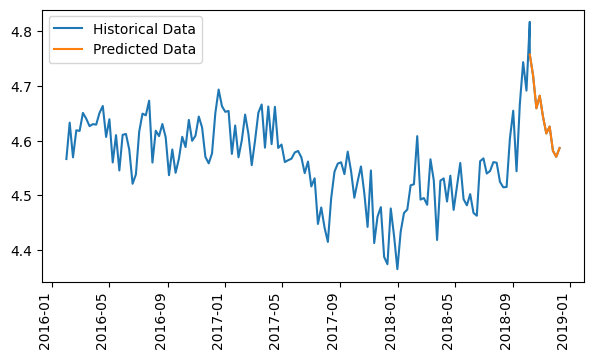

In [63]:
plt.figure(figsize=(7,4))
data1.iloc[900:].plot(label  = "Historical Data");
forecast.plot(label = "Predicted Data");
plt.legend(loc = "upper left",fontsize = 10);
plt.xticks(rotation = 90);

## sales will go down over the years 

## RMSE , MSE 

In [52]:
from sklearn.metrics import mean_squared_error

In [65]:
mse = mean_squared_error(prediction_model1,predict)
print("mse : ",mse)

mse :  0.016784939308539807


In [66]:
rmse = mean_squared_error(prediction_model1,predict,squared = False)
print("rmse : ",rmse)

rmse :  0.12955670306294387


## visual of count sentiemnt 

In [67]:
df_EX_positive=df1[df1['polarity']>0.75]
df_positive=df1[(df1['polarity']>0 )&(df1['polarity']<=0.75)]
df_negative=df1[(df1['polarity']<0 )&(df1['polarity']>=-0.75)]
df_EX_negative=df1[df1['polarity']<-0.75]
df_neutral=df1[df1['polarity']==0]

In [68]:
sentiment_values={"Sentiment":["Extreme Positve","Positive","Neutral","Negative","Extreme Negative"],
                  "Reviews Count":[len(df_EX_positive),len(df_positive),len(df_neutral),len(df_negative),len(df_EX_negative)]}
sentiment_values_df=pd.DataFrame(sentiment_values)

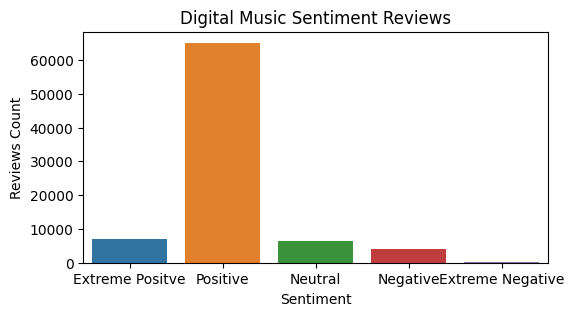

In [69]:
plt.figure(figsize=(6,3))
sns.barplot(data=df1,x=sentiment_values_df.Sentiment,y=sentiment_values_df["Reviews Count"])
plt.title("Digital Music Sentiment Reviews");

## Most of the sentiments are positive 

## musical instruments 

In [1]:
import moduleszzzzz as my 

In [2]:
### loading dataset
df = my.load_data_musical("Musical_Instruments.json","meta_Musical_Instruments.json")

In [4]:
musical_data=df[df.main_cat=="Musical Instruments"]

In [5]:
my.info(musical_data)

(760159, 18)

##########################################################

overall          int64
verified          bool
reviewTime      object
reviewerID      object
asin            object
style           object
reviewerName    object
reviewText      object
summary         object
category        object
description     object
title           object
brand           object
feature         object
rank            object
main_cat        object
date            object
price           object
dtype: object

##########################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760159 entries, 238 to 793390
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   overall       760159 non-null  int64 
 1   verified      760159 non-null  bool  
 2   reviewTime    760159 non-null  object
 3   reviewerID    760159 non-null  object
 4   asin          760159 non-null  object
 5   style         7601

In [6]:
## reviews column
musical_data["reviewText"]=musical_data["reviewText"].apply(my.reviews_cleaning)
musical_data["summary"]=musical_data["summary"].apply(my.reviews_cleaning)
musical_data = pd.read_csv("musical_filterr.csv")

In [7]:
# merging two columns 
musical_data["reviews"]=musical_data["reviewText"]+musical_data["summary"]
musical_data.drop(["reviewText","summary"],axis=1,inplace=True)

In [8]:
musical_data=musical_data.mask(musical_data == ' ')  #REMOVING EMPTY SPACE OR BLANKS

In [9]:
musical_data.dropna(inplace=True)  # removing null values 

In [10]:
### price column 
musical_data["price"]=musical_data["price"].apply(my.price_cleaning)

In [11]:
## CONVERTING DATE TIME COLUMN
musical_data["reviewTime"]=pd.to_datetime(musical_data["reviewTime"])

In [12]:
# rank column 
musical_data["Rank"]=musical_data["rank"].apply(my.rank_clean)
musical_data.dropna(inplace = True)
musical_data["Rank"]=musical_data["Rank"].apply(my.rank_clean1)

In [16]:
## FETCHING PRODUCTS
nltk.download('punkt')
musical_data["products"]=musical_data["category"].apply(my.products)
musical_data["products"]=musical_data["products"].apply(my.product_clean)
index = np.where(musical_data['products']=='. ')
musical_data.drop(index[0],inplace=True)
# #REMOVING EMPTY SPACE OR BLANKS
musical_data=musical_data.mask(musical_data == ' ')  
musical_data.dropna(inplace=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
musical_data.reset_index(inplace = True) # reset index 

In [18]:
musical_data['products'].value_counts() # products column

Accessories     344289
Microphones      40042
Stage            30964
Guitars          28134
Ukuleles         18227
Effects          11659
Percussion       11294
amp              10761
Recording        10328
Instruments       9805
Studio            8941
Violins           8916
Amplifiers        8617
Keyboards         7567
DJ                5864
Drums             4949
Drum              4359
Karaoke           3146
Mixers            2136
Speakers          1438
Lighting          1243
Processors         963
Electronic         774
Violas             569
Strobe             405
Cellos             327
Recorders          215
Banjos             207
Mandolins          190
Instrument          52
Upright             49
Chimes              31
French              23
Name: products, dtype: int64

In [19]:
# sub categories 
musical_data["sub_category"]=musical_data["products"].astype("string")
musical_data["sub_category"]=musical_data["sub_category"].apply(my.replace_products)
musical_data["sub_category"].value_counts()

Accessories           429747
Others                 61998
String Others          56570
Percussion             11294
Precussion Others       9308
Keyboards               7567
Name: sub_category, dtype: int64

In [20]:
## STYLE COLUMN CLEANING
musical_data["Style"]=musical_data["style"].apply(my.style)
musical_data["color"]=musical_data["style"].apply(my.color)
musical_data["format"]=musical_data["style"].apply(my.format)

In [21]:
musical_data.drop(['index'],inplace=True,axis = 1) # dropping index column
musical_data.head(2)  # display 

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,category,description,title,...,main_cat,date,price,reviews,Rank,products,sub_category,Style,color,format
0,5,True,2009-12-26,A13KUE1VBD1GSP,825603293,{'Format:': ' Misc. Supplies'},Scott,"['Musical Instruments', 'Wind &amp; Woodwind I...",['One of the premier pennywhistles in the worl...,Oak Pennywhistle In C (Oak Classic Pennywhistles),...,Musical Instruments,14-Oct-05,12.95,our teenager requested a pennywhistle for chri...,14178,Instruments,Others,NA,NA,Misc Supplies
1,5,True,2009-11-25,A2F2OTUAH5N801,825603293,{'Format:': ' Misc. Supplies'},Bobby G. Ming Jr.,"['Musical Instruments', 'Wind &amp; Woodwind I...",['One of the premier pennywhistles in the worl...,Oak Pennywhistle In C (Oak Classic Pennywhistles),...,Musical Instruments,14-Oct-05,12.95,the whistle was higher quality than previous o...,14178,Instruments,Others,NA,NA,Misc Supplies


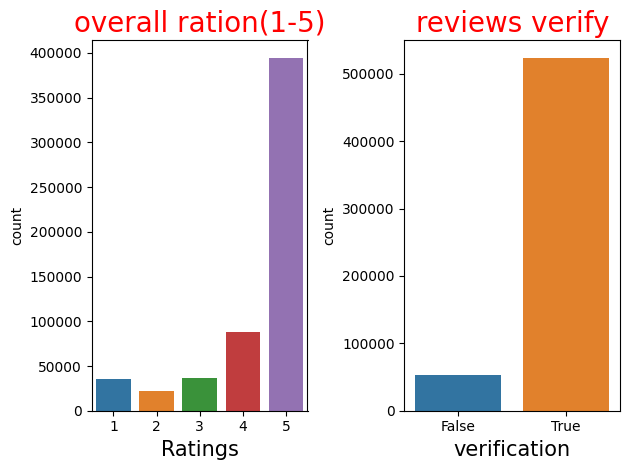

In [22]:
# visualization 
my.visual(musical_data,'overall','verified')

In [23]:
## PRODUCTS
musical_data["sub_category"]=musical_data["sub_category"].str.strip()
products_data=musical_data[(musical_data["sub_category"]=="Accessories")|(musical_data["sub_category"]=="String Others")|(musical_data["sub_category"]=="Percussion")]

In [24]:
## sentiment analysis
from textblob import TextBlob
# sentiment
sentiment=[]
polarity = []
for i in products_data["reviews"]:
    se=TextBlob(i)
    sco=se.sentiment.polarity
    polarity.append(sco)
    if sco>0:
        sentiment.append("positive")
    elif sco==0:
        sentiment.append("neutral")
    else:
        sentiment.append("negative")
products_data['sentiment'] = sentiment
products_data['polarity'] = polarity

positive    399487
neutral      62518
negative     35606
Name: sentiment, dtype: int64


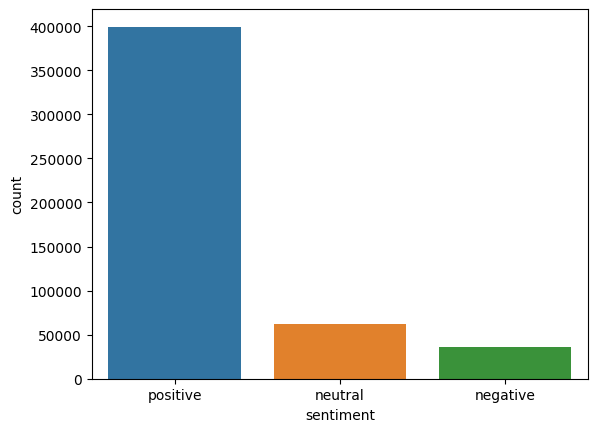

In [25]:
sns.countplot(products_data['sentiment']);
print(products_data['sentiment'].value_counts())

In [26]:
## tf-idf
products_data['reviews'] = my.tfidf(products_data,'reviews')
products_data['title'] = my.tfidf(products_data,'title')

In [27]:
# LABEL ENCODING 
col=["brand","sub_category",'verified','Style','color','format','sentiment']
for i in col:
    products_data[i] = my.label_encoding(products_data,i)

In [28]:
# drop 
products_data.drop(['reviewTime','asin','reviewerID','reviewerName','style','category','description','feature','main_cat','date','rank','products'],axis = 1,inplace = True)

In [29]:
## normalization 
products_data = my.normalization(products_data)
products_data['polarity'] = polarity
products_data.head()

,overall,verified,title,brand,price,reviews,Rank,sub_category,Style,color,format,sentiment,polarity
0,1.00,1.0,0.482399,0.165489,0.000916,0.235635,0.009456,0.0,0.509786,0.508412,0.4,1.0,0.274074
1,0.00,0.0,0.482399,0.165489,0.000916,0.069809,0.009456,0.0,0.509786,0.508412,0.4,0.5,0.000000
2,0.00,1.0,0.482399,0.165489,0.000916,0.062115,0.009456,0.0,0.509786,0.508412,0.4,0.0,-0.200000
3,0.25,1.0,0.482399,0.165489,0.000916,0.054649,0.009456,0.0,0.509786,0.508412,0.4,0.0,-0.200000
4,0.50,1.0,0.482399,0.165489,0.000916,0.170674,0.009456,0.0,0.509786,0.508412,0.4,1.0,0.044949


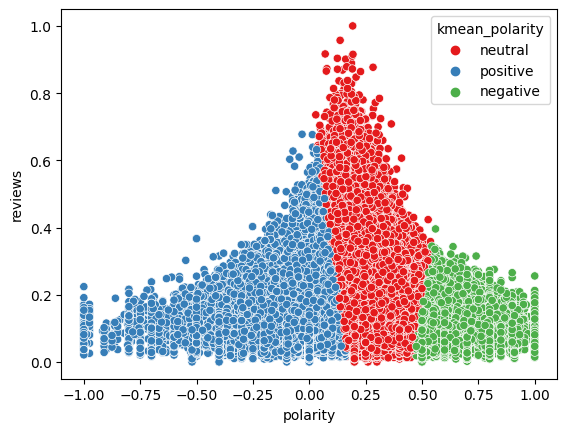

In [30]:
## clustering 
my.clusteringg(products_data,'polarity','reviews')

### visual of count sentiemnt

In [31]:
df_EX_positive=products_data[products_data['polarity']>0.75]
df_positive=products_data[(products_data['polarity']>0 )&(products_data['polarity']<=0.75)]
df_negative=products_data[(products_data['polarity']<0 )&(products_data['polarity']>=-0.75)]
df_EX_negative=products_data[products_data['polarity']<-0.75]
df_neutral=products_data[products_data['polarity']==0]

In [32]:
sentiment_values={"Sentiment":["Extreme Positve","Positive","Neutral","Negative","Extreme Negative"],
                  "Reviews Count":[len(df_EX_positive),len(df_positive),len(df_neutral),len(df_negative),len(df_EX_negative)]}
sentiment_values_df=pd.DataFrame(sentiment_values)

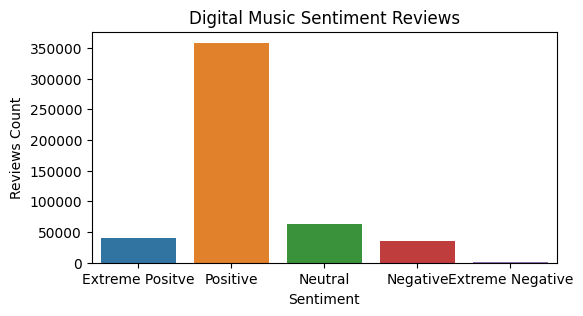

In [33]:
plt.figure(figsize=(6,3))
sns.barplot(data=products_data,x=sentiment_values_df.Sentiment,y=sentiment_values_df["Reviews Count"])
plt.title("Digital Music Sentiment Reviews");

## time series 

In [35]:
df = pd.read_csv("time_series_stratifed_sample.csv",parse_dates=True,index_col="reviewTime")

In [36]:
s_a=df[df.type=='Accessories'][['overall']]
s_s=df[df.type=='String Instruments'][['overall']]
s_p=df[df.type=='Percussion Instruments'][['overall']]

## accessories 

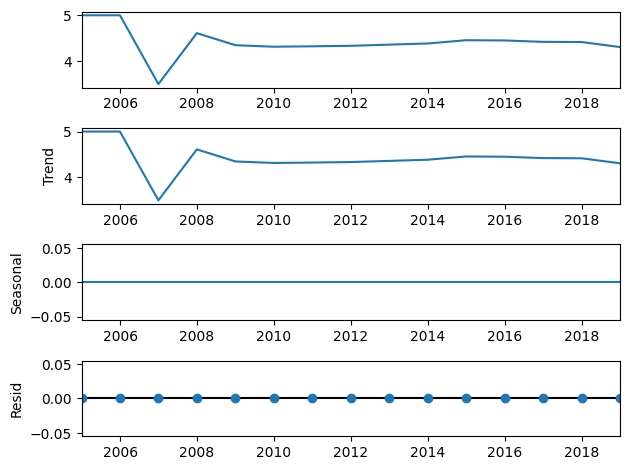

In [37]:
y_a=s_a.resample('y').mean()  #resample for year and taking average ratings
my.seasonal(y_a,1)

### trend is present

In [38]:
import my_function as my1

In [41]:
# stationary check
my1.checkstationary(y_a)
diff1=y_a-y_a.shift()   
print("#################")
diff1.dropna(inplace=True)
my1.checkstationary(diff1) #data is stationary at shift, d=1

pvalue :  0.3496048358715885
Data is not Stationary
#################
pvalue :  4.7412516961237996e-08
Data is Stationary


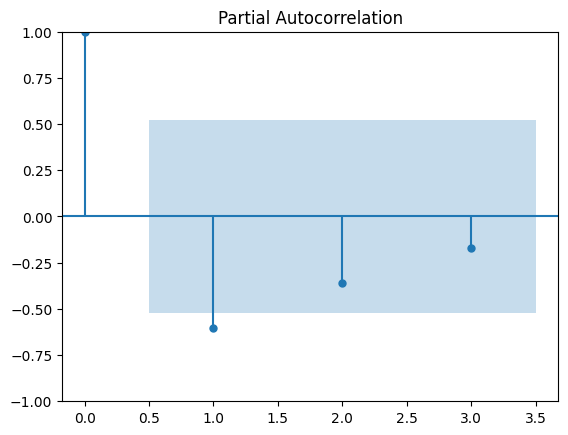

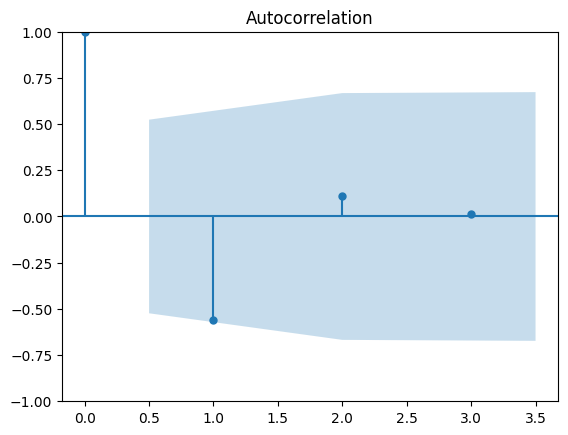

In [42]:
plot_pacf(diff1,lags=3);
plot_acf(diff1,lags=3);

In [43]:
my1.arima(y_a,4,4,1)

p : 1, q : 1, AIC :  17.69184597652425
p : 1, q : 2, AIC :  17.73964221934229
p : 1, q : 3, AIC :  18.250579629107527
p : 2, q : 1, AIC :  14.986547751906368
p : 2, q : 2, AIC :  16.96261520089051
p : 2, q : 3, AIC :  265.9460723134142
p : 3, q : 1, AIC :  16.96842887376376
p : 3, q : 2, AIC :  18.827107302944
p : 3, q : 3, AIC :  267.94598819849386


In [46]:
arima1=ARIMA(y_a,order=(2,1,2)).fit()  # data is not stationary going with arima model
print(arima1.summary())

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                   15
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  -3.481
Date:                Tue, 21 Mar 2023   AIC                             16.963
Time:                        11:38:26   BIC                             20.158
Sample:                    12-31-2004   HQIC                            16.667
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6652      0.847     -0.786      0.432      -2.325       0.994
ar.L2         -0.7601      0.190     -3.998      0.000      -1.133      -0.387
ma.L1         -1.0763     28.280     -0.038      0.9

In [47]:
arima1.forecast(6)

2019-12-31    4.398946
2020-12-31    4.420710
2021-12-31    4.336776
2022-12-31    4.376065
2023-12-31    4.413727
2024-12-31    4.358812
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [48]:
yar=y_a[-1:] #appending previous values
yar_d=pd.DataFrame(arima1.forecast(6))
yar_d.columns=['overall']
yar_p=pd.concat([yar,yar_d],axis=0)

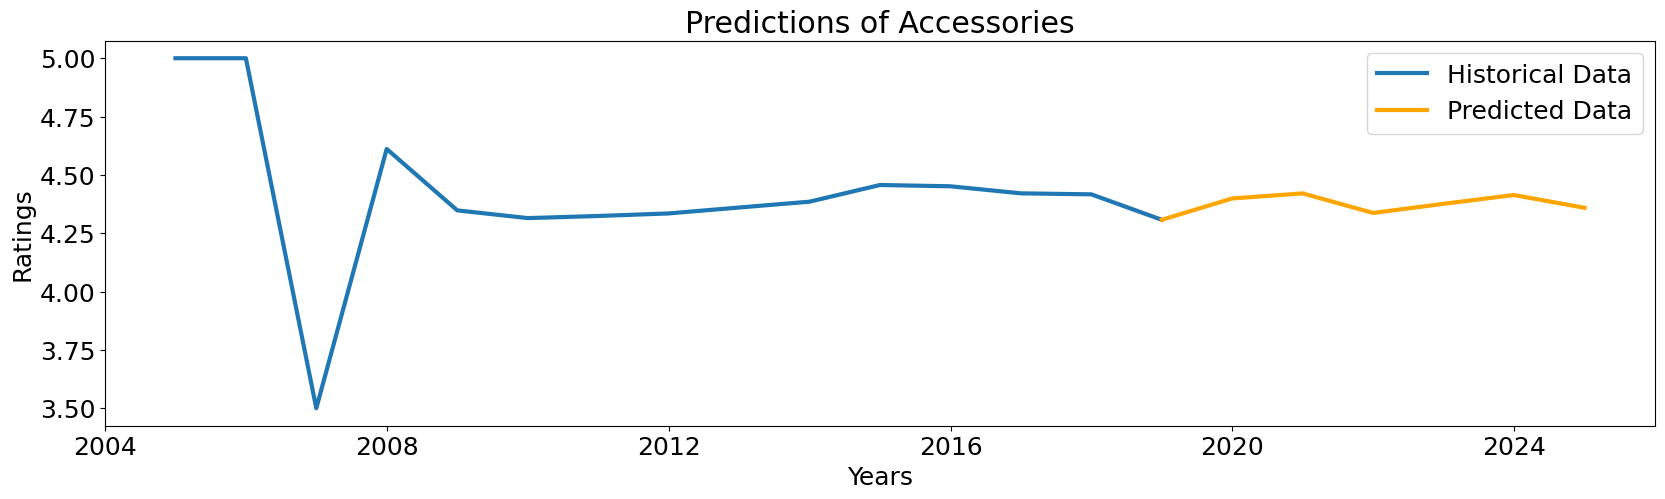

In [50]:
my.visual('Accessories',y_a,yar_p)

In [53]:
split=int(0.7*len(y_a))
train=y_a.iloc[:split]
test=y_a.iloc[split:]
predictions_a=arima1.predict(len(train),len(test+train)-1)
predict = arima1.predict()
mse_a=mean_squared_error(test,predictions_a)
rmse_a=mean_squared_error(test,predictions_a,squared=False)
print('MSE:',mse_a)
print('RMSE:',rmse_a)

MSE: 0.02075870707918436
RMSE: 0.1440788224521021


## string instruments

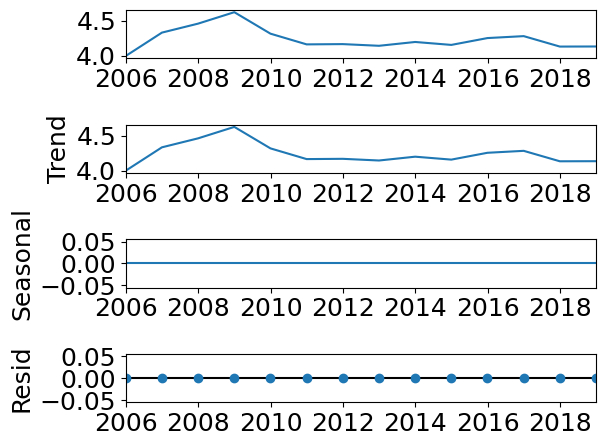

In [97]:
y_s=s_s.resample('y').mean()  # resample into years and taking average ratings
my.seasonal(y_s,1)
plt.rcParams.update({'font.size': 8})

## trend is present

In [98]:
my1.checkstationary(y_s)  #data is not stationary
print("########")
diff2=y_s-y_s.shift()
diff2.dropna(inplace=True)
my1.checkstationary(diff2) #at shift d=1 data became stationary

pvalue :  0.2644111494389314
Data is not Stationary
########
pvalue :  0.011951948839620816
Data is Stationary


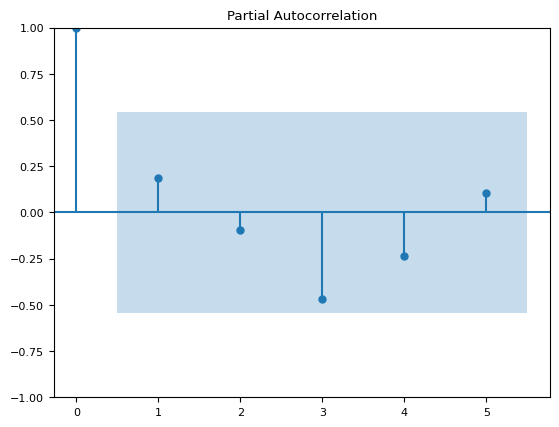

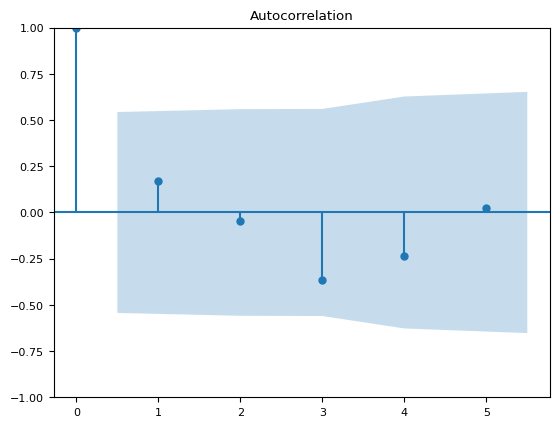

In [99]:
plot_pacf(diff2,lags=5);
plot_acf(diff2,lags=5);

In [100]:
my1.arima(y_s,4,4,1)

p : 1, q : 1, AIC :  -6.199562316332811
p : 1, q : 2, AIC :  -6.354714243406498
p : 1, q : 3, AIC :  -8.414690856734467
p : 2, q : 1, AIC :  -7.516872941409293
p : 2, q : 2, AIC :  -3.311344225133931
p : 2, q : 3, AIC :  -6.727023913591708
p : 3, q : 1, AIC :  -7.052082311850683
p : 3, q : 2, AIC :  -5.06408914094224
p : 3, q : 3, AIC :  -5.3370533876072805


In [101]:
arima3=ARIMA(y_s,order=(2,1,2)).fit()  # data is not stationary going with arima model
print(arima3.summary())

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                   14
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   6.656
Date:                Tue, 21 Mar 2023   AIC                             -3.311
Time:                        12:38:22   BIC                             -0.487
Sample:                    12-31-2005   HQIC                            -3.892
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1373      0.955     -0.144      0.886      -2.008       1.734
ar.L2          0.3916      0.921      0.425      0.671      -1.414       2.197
ma.L1          0.0102    250.409   4.07e-05      1.0

In [102]:
arima3.forecast(4)

2019-12-31    4.194746
2020-12-31    4.182214
2021-12-31    4.207230
2022-12-31    4.198888
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [103]:
ysa=y_s[-1:]
ysa_d=pd.DataFrame(arima3.forecast(4))
ysa_d.columns=['overall']
ysa_p=pd.concat([ysa,ysa_d],axis=0)

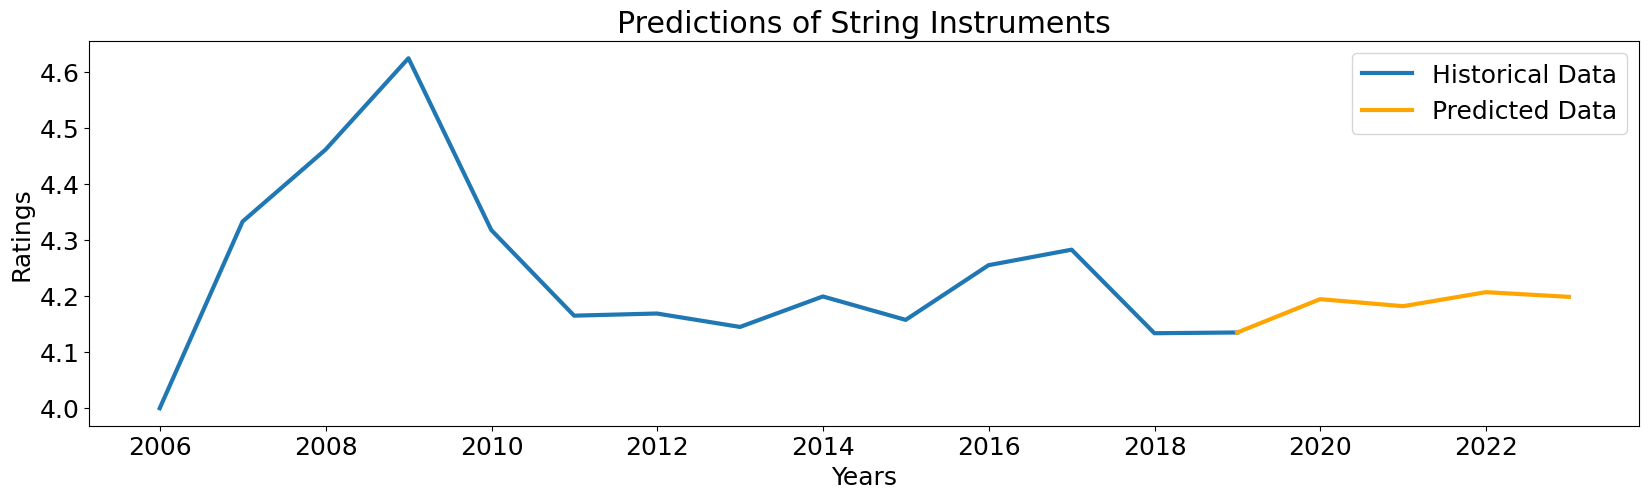

In [104]:
my.visual('String Instruments',y_s,ysa_p)

In [105]:
split=int(0.7*len(y_s))
train=y_s.iloc[:split]
test=y_s.iloc[split:]
predictions_a=arima3.predict(len(train),len(test+train)-1)
predict = arima3.predict()
mse_a1=mean_squared_error(test,predictions_a)
rmse_a1=mean_squared_error(test,predictions_a,squared=False)
print('MSE:',mse_a1)
print('RMSE:',rmse_a1)

MSE: 0.004660483937878028
RMSE: 0.06826773716682008


## percussion instruments

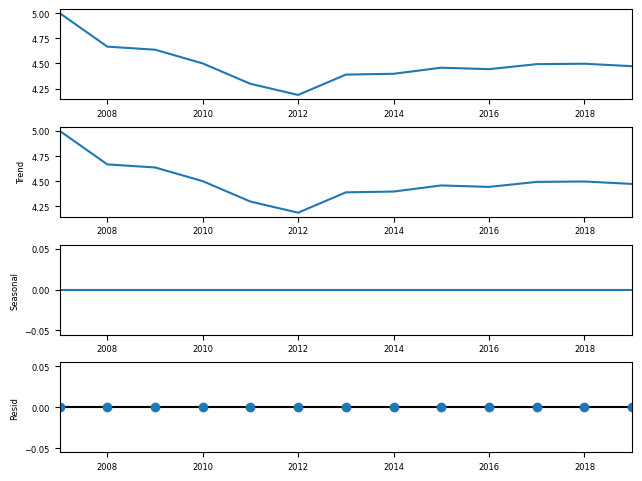

In [109]:
y_p=s_p.resample('y').mean()  #resample into years
my.seasonal(y_p,1)
plt.rcParams.update({'font.size': 8})

## trend is present

In [110]:
# stationary check
my1.checkstationary(y_p)

pvalue :  0.026308916213600788
Data is Stationary


In [111]:
ftp1=SimpleExpSmoothing(y_p).fit(smoothing_level=0.6) 
#data is stationary trend is present so going with simple exponential smoothing

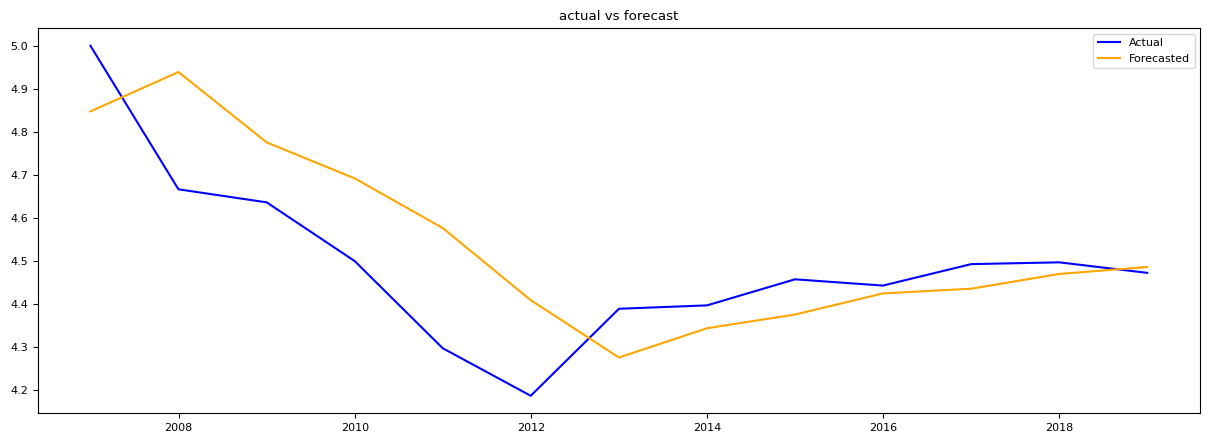

In [112]:
forecast_p=ftp1.fittedvalues
plt.figure(figsize=(15,5))
plt.plot(y_p,color='blue',label='Actual')
plt.plot(forecast_p,color='orange',label='Forecasted')
plt.legend()
plt.title("actual vs forecast");
plt.rcParams.update({'font.size': 14})

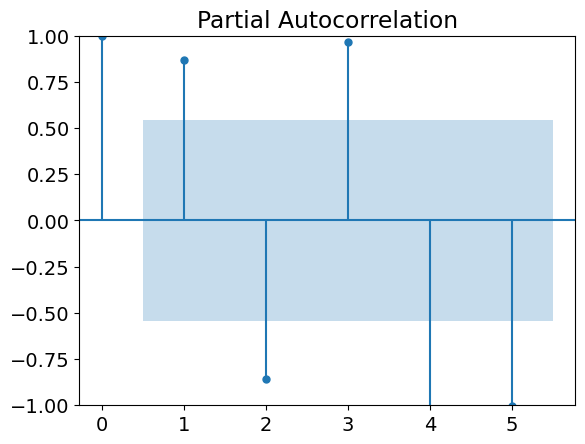

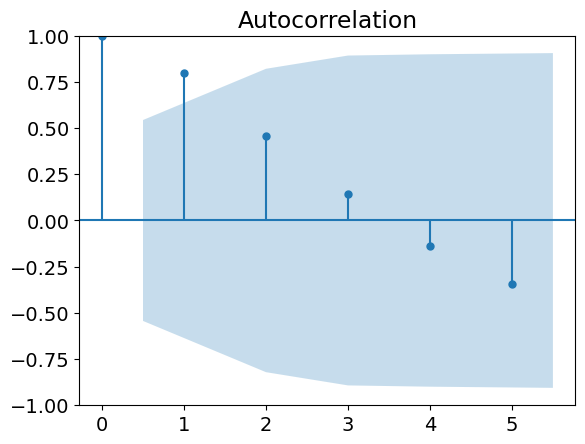

In [113]:
plot_pacf(forecast_p,lags=5);
plot_acf(forecast_p,lags=5);

In [114]:
my1.arma(forecast_p,6,2,0)

p : 1, q : 1, AIC :  -17.836627010215803
p : 2, q : 1, AIC :  -20.503625889842546
p : 3, q : 1, AIC :  -18.512492850205117
p : 4, q : 1, AIC :  -15.677966930324367
p : 5, q : 1, AIC :  -16.210711772328906


In [115]:
arma3=ARIMA(forecast_p,order=(5,0,1)).fit()
print(arma3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(5, 0, 1)   Log Likelihood                  16.105
Date:                Tue, 21 Mar 2023   AIC                            -16.211
Time:                        12:39:05   BIC                            -11.691
Sample:                    12-31-2006   HQIC                           -17.140
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5260      0.066     68.240      0.000       4.396       4.656
ar.L1          0.4608      0.836      0.552      0.581      -1.177       2.098
ar.L2          0.3641      1.329      0.274      0.7

In [116]:
arma3.forecast(4)

2019-12-31    4.566526
2020-12-31    4.582658
2021-12-31    4.616250
2022-12-31    4.598285
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [117]:
p=pd.DataFrame(forecast_p[-1:])  #appending previous values
p.columns=['overall']
arip=pd.DataFrame(arma3.forecast(4))
arip.columns=['overall']
forec=pd.concat([p,arip],axis=0)

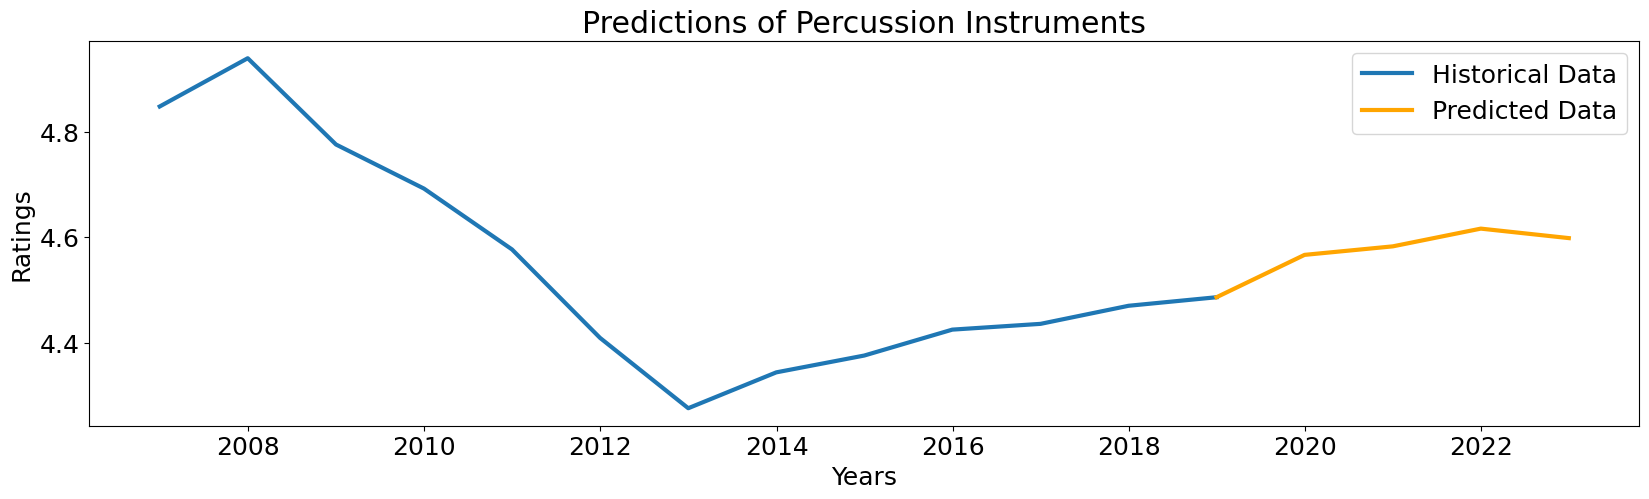

In [118]:
my.visual('Percussion Instruments',forecast_p,forec)

In [119]:
split=int(0.7*len(forecast_p))
train=forecast_p.iloc[:split]
test=forecast_p.iloc[split:]

predictions_a=arma3.predict(len(train),len(test+train)-1)
predict = arma3.predict()
mse_a2=mean_squared_error(test,predictions_a)
rmse_a2=mean_squared_error(test,predictions_a,squared=False)
print('MSE:',mse_a2)
print('RMSE:',rmse_a2)

MSE: 0.0021336306901805382
RMSE: 0.04619124040530345


In [120]:
# comparison
dict1={'Type':['Acessories(ARIMA)','String(ARIMA)','Precurssion(ARMA)'],'Mean_squared_error':[mse_a,mse_a1,mse_a2],'Root_mean_squared_error':[rmse_a,rmse_a1,rmse_a2]}
compare=pd.DataFrame(dict1)
compare

,Type,Mean_squared_error,Root_mean_squared_error
0,Acessories(ARIMA),0.002134,0.046191
1,String(ARIMA),0.004660,0.068268
2,Precurssion(ARMA),0.002134,0.046191


## wordcloud 

In [121]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
import matplotlib.pylab as plt 
from PIL import Image

In [123]:
df = pd.read_csv("musical_data_eda.csv")

In [124]:
stop_w = list(STOPWORDS)
stop_w.extend(["ones","bought","one","string","will","pick","Suse","uses","uSeS","S","use","good","star","strings","work",
              "well","little","Stand","don't","don t","love","amp","ve","stars","better","great","keyboard nothing think",
              "hole","month","problem","works","product","even","fine","small","sound","used","play","money","strap","don","t",
              "using","using","know","buy","trying","stay","daughter","though","year","job","months","recommend","hold","case",
               "place","expected","reed","arm","much","capo","m","didn","seem","doesn","reeds","way","make","got","two","something",
              "may","cable"])
stopwords = set(stop_w)

In [125]:
negative = df[(df.sentiment == 'negative')]
negative.shape

(40044, 4)

In [127]:
word_cloud = WordCloud(stopwords=stopwords, width = 1600 , height = 800,background_color='white').generate(" ".join(negative['reviews']))

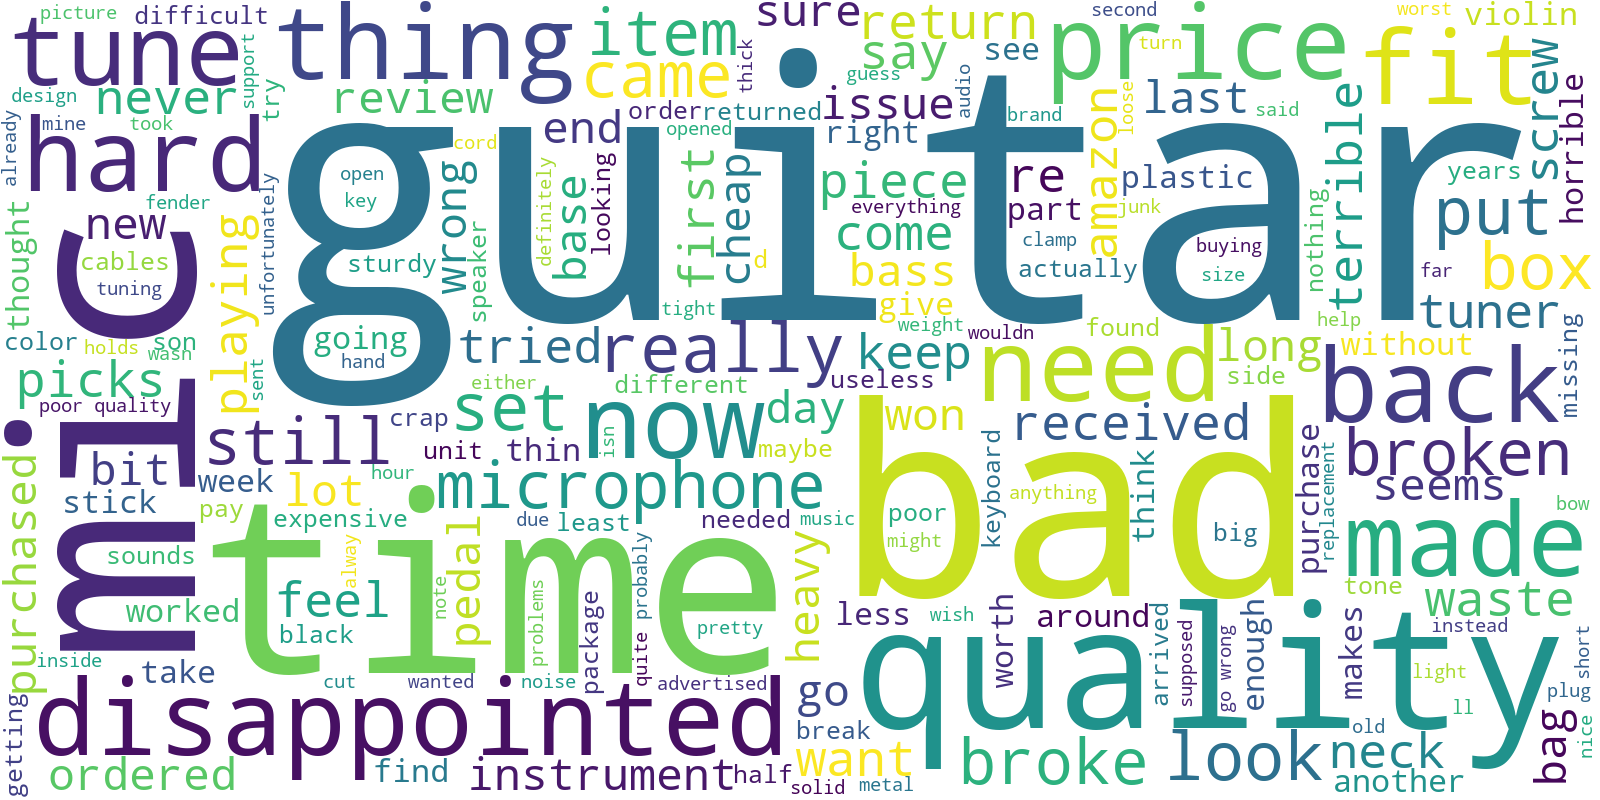

In [128]:
word_cloud.to_image()

## most negative reviews are related to guitar